Today we are going to be going over a basic R tutorial using music. We need to start by importing all of the necessary packages. I have gone ahead and listed those for you in the code cell below. Make sure you run this first or else nothing else will work. This first cell should be run to install all of the necessary packages onto this coding environment.

In [24]:
install.packages('geniusr')
install.packages('tidytext')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('stringr')
install.packages('textdata')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘rappdirs’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Next, we need to include all of the libraries that we will be accessing with the R language. There are tons of different libraries, but we will be using the following three for this assignment. The most important library for this notebook is geniusr. This is what will allow us to access all of the lyrics on the genius website. 

In [1]:
library(geniusr) 
library(tidyverse)
library(tidytext)
library(ggplot2)
library(dplyr)
library(stringr)
library(textdata)

ERROR: Error in library(geniusr): there is no package called ‘geniusr’


In order to access the geniusr library, we have to set up an account with them and get an API key. This is never a fun process, so don't feel bad if it takes you a bit to navigate the site. You can sign up here https://genius.com/signup_or_login. For the website URL I linked my jupyter lab and the name of the app was "Homework1". This names are not important, we are just trying to get the API key. Once you have the key, you need to set the GENIUS_API_TOKEN to the API key that you generated. Simply fill in the '' below with your key and run the cell. 

In [2]:
Sys.setenv(GENIUS_API_TOKEN = '6I2y8PmTdL5xU615YndcCaa1wGBuLDQBhkquN8LK6Dp6Uxpekl6WAhe1uPbxciIM')

If everything worked correctly, you should be able to run the next cell and get a big output of all of the metadata that is stored for each song. The song ID can be changed to get all of this metadata for any song on their website.

Getting the song_id can be a little tedius, but that's okay because we do not always need it! We can get the lyrics of a song by knowing the name of it and the name of the artist who created it. Check out the cell below as an example! As you can see, the table is split into several colums already. You might not know it, but this is going to save you A LOT of time because we don't have to "scrub" or manually clean/categorize the data ourself. Now that you know the basic formula, you can get the lyrics of any song you want! Simply replace the artist name and song title with a piece of music that you are interested in and let it run. As a side note, you do not have to worry about capitalization when filling out the artist name and title. Just make sure they are spelled correctly! Make sure that you give a name to the song so that we can add it to a corpus in a little bit! You can do this by putting whatever name you want in front of the function and then adding a "<-". Type the name by itself it view your table.

In [3]:
song1 <- get_lyrics_search(artist_name = "Ice Cube", song_title = "Why We Thugs")
head(song1, 10)

ERROR: Error in get_lyrics_search(artist_name = "Ice Cube", song_title = "Why We Thugs"): could not find function "get_lyrics_search"


We can do a lot of fun things once we have the lyrics in this table format called a "tibble". For instance, we can see how many times Kanye says "good morning" on his song "Good Morning". Check this out! As you can see, it was said 18 times! Pretty cool, huh? You can check out the details for unnest_tokens here https://www.rdocumentation.org/packages/tidytext/versions/0.3.0/topics/unnest_tokens.

In [9]:
get_lyrics_search(artist_name = "Kanye West", song_title = "Good Morning") %>% # the %>% symbol here is used to group more complex functions together, you will get used to typing it out
    #this line is splitting all of the lyrics into groups of 2 words.
    #you can unnest by "ngrams" with a specific n to specify how many words
    #you can also unnest by "words" and many other things. Look into the unnest_tokens function if you would like to seperate by something else
    unnest_tokens(bigram, line, token = "ngrams", n = 2) %>%
    #filter is going to make a new table that only contains occurances of "good morning"
    filter(bigram == "good morning") %>%
    #nrow returns the number of rows
    nrow()



[1] 18

I'm going to talk about a few of the functions that we can use, but if you would like to see a full list of the "basics" for this library check out this link https://ewenme.github.io/geniusr/articles/geniusr.html#auth. If you don't want to search by artist name and song name you can simply copy and paste the url from genius.com into the "get_lyrics_url()" function. It will retreive the same data, so do what feels best for you!

In [11]:
# get_artist(artist_name = "kendrick lamar")
head(get_lyrics_url('https://genius.com/Ice-cube-why-we-thugs-lyrics'))

line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"Yeah, every hood's the same",Intro,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
"Every hood's the same, come on",Intro,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
They give us guns and drugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
Then wonder why in the fuck we thugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
They wanna count the slugs,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics
Then come around here and fuck with us,Hook,Ice Cube,Why We Thugs,Ice Cube,https://genius.com/Ice-cube-why-we-thugs-lyrics


Now you try! Take one of your favorite songs that's on genius and try to get the tibble with the lyrics to show. you can comment out the function that you DO NOT use with a "#" (no quotes)

In [ ]:
get_lyrics_search(artist_name = "", song_title = "")
get_lyrics_url('')

Now that we understand the basics of loading in a song, we can combine a bunch of them together to make a corpus! I'm going to be using the url function, but this will also work with the search function if you prefer that! I'm going to create a corpus of some Mac Miller songs because I miss him dearly :(. I'm going to select the top 5 most viewed songs of his on genius. This template would be great if you wanted to combine an entire album together for analysis! We are loading a bunch of songs into data frames for the first 5 lines, and then we use rbind to combine the dataframes together. You can see the new table of songs below.

In [13]:
song1 <- get_lyrics_url('https://genius.com/Mac-miller-self-care-lyrics')
song2 <- get_lyrics_url('https://genius.com/Mac-miller-good-news-lyrics')
song3 <- get_lyrics_url('https://genius.com/Mac-miller-weekend-lyrics')
song4 <- get_lyrics_url('https://genius.com/Mac-miller-objects-in-the-mirror-lyrics')
song5 <- get_lyrics_url('https://genius.com/Mac-miller-2009-lyrics')

songs <- rbind(song1,song2,song3,song4,song5)
head(songs)
tail(songs)

line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"Mhm, mhm",Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics
Okay,Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics
"Yeah, yeah, yeah, yeah",Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics
"Yeah, yeah, yeah",Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics
Dollars,Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics
"I switched the time zone, but what do I know?",Chorus,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics


line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
She don't cry no more,Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics
"She tell me that I get her high 'cause an angel's s'posed to fly, and",Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics
"I ain't askin' ""Why?"" no more",Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics
"Oh, no, I take it if it's mine, I don't stay inside the lines",Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics
It ain't 2009 no more,Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics
"Yeah, I know what's behind that door",Chorus,Mac Miller,2009,Mac Miller,https://genius.com/Mac-miller-2009-lyrics


This is a sentiment analysis of mac millers albums

In [156]:
kids1 <- get_lyrics_url('https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics')
kids2 <- get_lyrics_url('https://genius.com/Mac-miller-outside-lyrics')
kids3 <- get_lyrics_url('https://genius.com/Mac-miller-get-em-up-lyrics')
kids4 <- get_lyrics_url('https://genius.com/Mac-miller-nikes-on-my-feet-lyrics')
kids5 <- get_lyrics_url('https://genius.com/Mac-miller-senior-skip-day-lyrics')
kids6 <- get_lyrics_url('https://genius.com/Mac-miller-the-spins-lyrics')
kids7 <- get_lyrics_url('https://genius.com/Mac-miller-traffic-in-the-sky-lyrics')
kids8 <- get_lyrics_url('https://genius.com/Mac-miller-dont-mind-if-i-do-lyrics')
kids9 <- get_lyrics_url('https://genius.com/Mac-miller-paper-route-lyrics')
kids10 <- get_lyrics_url('https://genius.com/Mac-miller-good-evening-lyrics')
kids11 <- get_lyrics_url('https://genius.com/Mac-miller-ride-around-lyrics')
kids12 <- get_lyrics_url('https://genius.com/Mac-miller-knock-knock-lyrics')
kids13 <- get_lyrics_url('https://genius.com/Mac-miller-mad-flava-heavy-flow-interlude-lyrics')
kids14 <- get_lyrics_url('https://genius.com/Mac-miller-kool-aid-and-frozen-pizza-lyrics')
kids15 <- get_lyrics_url('https://genius.com/Mac-miller-all-i-want-is-you-lyrics')
kids16 <- get_lyrics_url('https://genius.com/Mac-miller-poppy-lyrics')
kids17 <- get_lyrics_url('https://genius.com/Mac-miller-face-in-the-crowd-lyrics')
kids18 <- get_lyrics_url('https://genius.com/Mac-miller-la-la-la-la-lyrics')

kids <- rbind(kids1, kids2, kids3, kids4, kids5, kids6, kids7, kids8, kids9, kids10, kids11, kids12, kids13, kids14, kids15, kids16, kids17, kids18)


swimming1 <- get_lyrics_url('https://genius.com/Mac-miller-come-back-to-earth-lyrics')
swimming2 <- get_lyrics_url('https://genius.com/Mac-miller-hurt-feelings-lyrics')
swimming3 <- get_lyrics_url('https://genius.com/Mac-miller-whats-the-use-lyrics')
swimming4 <- get_lyrics_url('https://genius.com/Mac-miller-perfecto-lyrics')
swimming5 <- get_lyrics_url('https://genius.com/Mac-miller-self-care-lyrics')
swimming6 <- get_lyrics_url('https://genius.com/Mac-miller-wings-lyrics')
swimming7 <- get_lyrics_url('https://genius.com/Mac-miller-ladders-lyrics')
swimming8 <- get_lyrics_url('https://genius.com/Mac-miller-small-worlds-lyrics')
swimming9 <- get_lyrics_url('https://genius.com/Mac-miller-conversation-pt-1-lyrics')
swimming10 <- get_lyrics_url('https://genius.com/Mac-miller-dunno-lyrics')
swimming11 <- get_lyrics_url('https://genius.com/Mac-miller-jet-fuel-lyrics')
swimming12 <- get_lyrics_url('https://genius.com/Mac-miller-2009-lyrics')
swimming13 <- get_lyrics_url('https://genius.com/Mac-miller-so-it-goes-lyrics')

swimming <- rbind(swimming1, swimming2, swimming3, swimming4, swimming5, swimming6, swimming7, swimming8, swimming9, swimming10, swimming11, swimming12, swimming13)


In [157]:
head(kids)
head(swimming)

line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"When you're young, not much matters",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you find something that you care about, then that's all you got",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you go to sleep at night, you dream of music",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"When you wake up, it's the same thing",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
"It's there in your face, you can't escape it",Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics
Sometimes when you're young,Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics


line,section_name,section_artist,song_name,artist_name,song_lyrics_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
My regrets look just like texts I shouldn't send,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
"And I got neighbors, they're more like strangers",Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
We could be friends,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
I just need a way out,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
Of my head,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics
I'll do anything for a way out,Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics


In [158]:
afinn <- read.delim("afinn.txt", header = FALSE)
colnames(afinn)[1] <- "word"
colnames(afinn)[2] <- "score"
head(afinn)
# get_sentiments("afinn")

,word,score
,<chr>,<int>
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2
6,abductions,-2


In [166]:
split_kids <- unnest_tokens(tbl = kids, output = word, input = line, token = "words", to_lower = TRUE)
filtered_kids <- filter(split_kids, word %in% afinn$word)

split_swimming <- unnest_tokens(tbl = swimming, output = word, input = line, token = "words", to_lower = TRUE)
filtered_swimming <- filter(split_swimming, word %in% afinn$word)

head(filtered_kids)
head(filtered_swimming)

kids_afinn <- merge(filtered_kids, afinn, by = "word", all.x = TRUE)
sum(kids_afinn$score)

swimming_afinn <- merge(filtered_swimming, afinn, by = "word", all.x = TRUE)
sum(swimming_afinn$score)

section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,matters
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,care
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,dream
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,escape
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,love
Intro,Telly & Mac Miller,Kickin’ Incredibly Dope Shit (Intro),Mac Miller,https://genius.com/Mac-miller-kickin-incredibly-dope-shit-intro-lyrics,shit


section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,regrets
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Chorus,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,like
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,yeah
Verse,Mac Miller,Come Back to Earth,Mac Miller,https://genius.com/Mac-miller-come-back-to-earth-lyrics,hell


[1] -115

[1] 105

After you have made your corpus you can start to make some graphs out of it! We will be using ggplot2 to do this. Most of the time we need to unnest_tokens if we are looking at word frequency. It is also good practice to filter out arbitrary words from your data because they will be the highest frequency words. You can easily check this if you do not believe me by graphing a song without filtering the data. You will see that the top words won't provide much room for analysis. stop_words is huge and houses lots of different categories to filter out words. Look through the different libraries to decide which one you should use. (PUT LINK HERE)

In [137]:
split <- unnest_tokens(tbl = song1, output = word, input = line, token = "words", to_lower = TRUE)
head(split)

data(stop_words)
head(stop_words)
# ! means not and %in% just means inside the stop_words list. So we are not filtering words that in the stop_words package (i think? familiarize with filter)
# top <- filter(split!word %in% afinn$v1)

head(top)
# top_counts <- count(x = top, word, sort = TRUE)

# head(top_counts)

section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,mhm
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,mhm
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,okay
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah


word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


section_name,section_artist,song_name,artist_name,song_lyrics_url,word
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,mhm
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,mhm
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,okay
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah
Intro,Mac Miller,Self Care,Mac Miller,https://genius.com/Mac-miller-self-care-lyrics,yeah


We can also unnest_tokens on our corpus of several songs. Now we can start graphing!

word,n
<fct>,<int>
the,88
it,64
you,64
and,54
to,50
a,49
me,40
no,38
don't,37


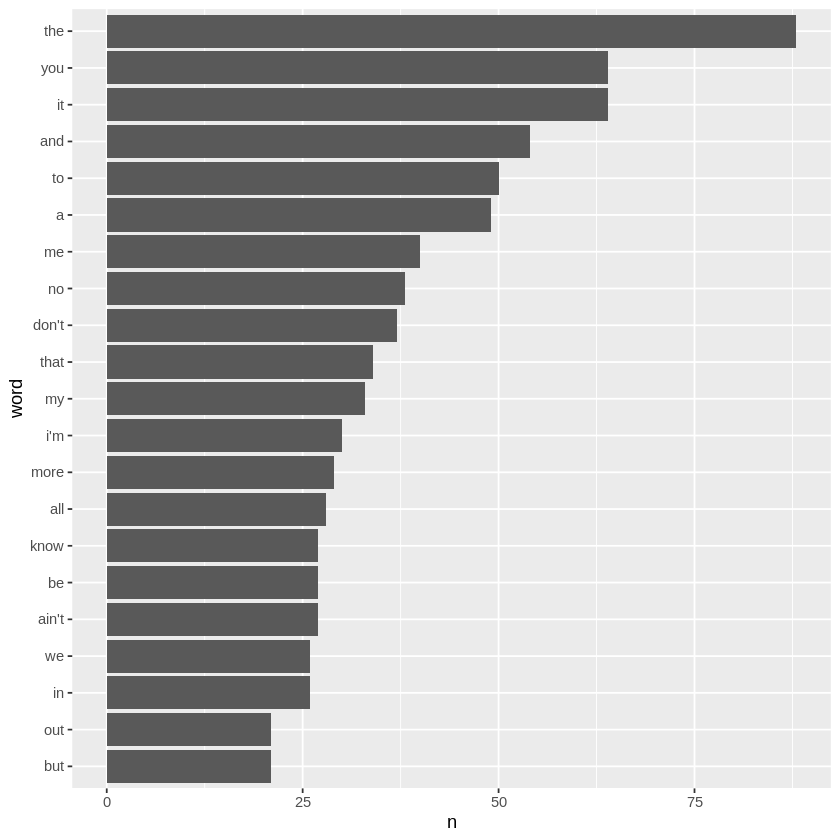

In [201]:
split <- unnest_tokens(tbl = songs, output = word, input = line, token = "words", to_lower = TRUE)

data(stop_words)
# stop_words

top <- split %>% filter(!word %in% stop_words) %>% filter(word != 'i') %>% filter(word != 'yeah')

#reorder puts it in desc order
top_counts <- count(x = top, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))
top_counts 

graph <- ggplot(top_counts, aes(n,word)) +
    geom_col()
graph


we can also use bigrams!

word,n
<fct>,<int>
yeah yeah,38
no more,26
i don't,19
i know,14
oblivion yeah,12
by the,10
it ain't,10
the time,10
the weekend,10


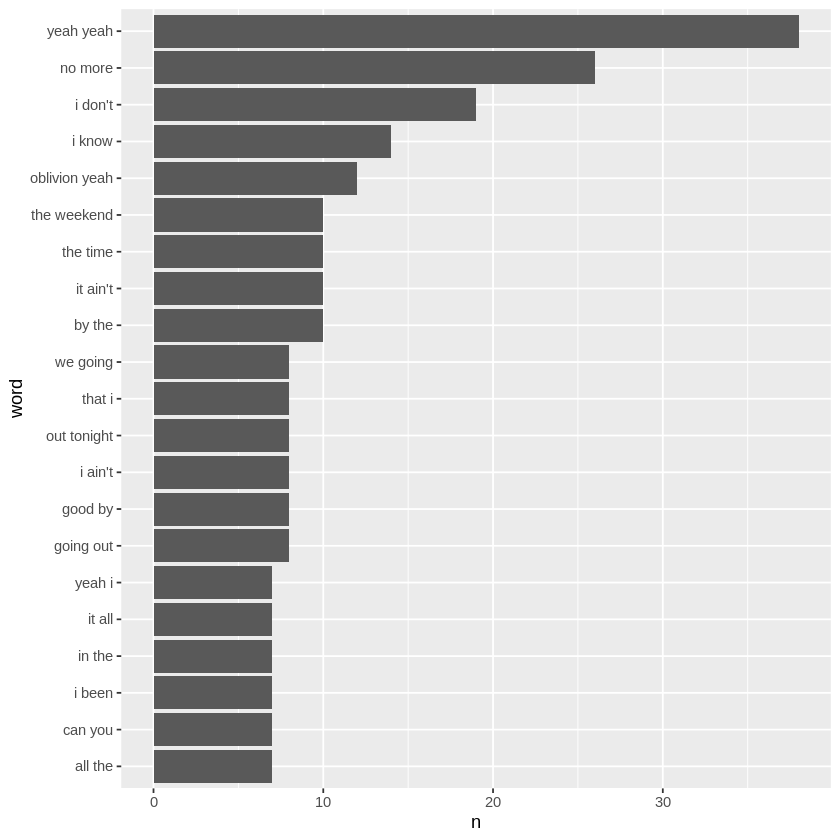

In [191]:
split <- unnest_tokens(tbl = songs, output = word, input = line, token = "ngrams", n = 2, to_lower = TRUE)

data(stop_words)
# stop_words

top <- split %>% filter(!word %in% stop_words) %>% filter(word != 'i') %>% filter(word != 'yeah')

#reorder puts it in desc order
top_counts <- count(x = top, word, sort = TRUE) %>% top_n(20, wt = n) %>% mutate(word = reorder(word,n))
top_counts 

graph <- ggplot(top_counts, aes(n,word)) +
    geom_col()
graph


or skip grams!

word,n
<fct>,<int>
yeah yeah yeah,18
oblivion yeah yeah,12
by the weekend,10
going out tonight,8
good by the,8
we going out,8
be good by,6
more no more,6
no more no,6


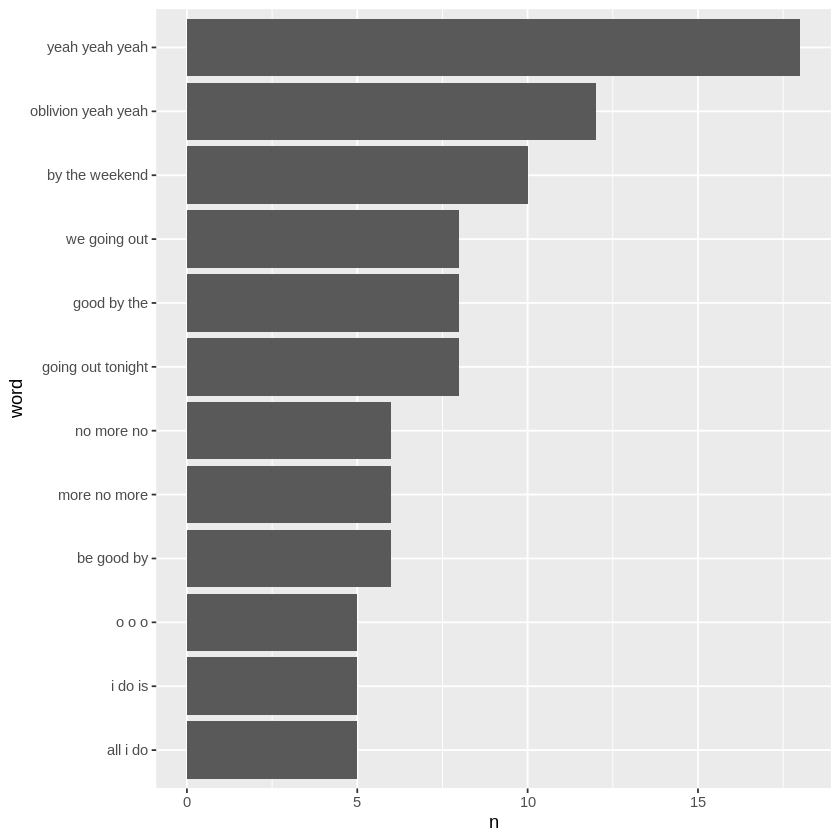

In [164]:
split <- unnest_tokens(tbl = songs, output = word, input = line, token = "ngrams", n = 3, to_lower = TRUE)

data(stop_words)

top <- split %>% filter(!word %in% stop_words) %>% filter(word != 'i') %>% filter(word != 'yeah')

#reorder puts it in desc order
top_counts <- count(x = top, word, sort = TRUE) %>% top_n(10, wt = n) %>% mutate(word = reorder(word,n))
top_counts 

graph <- ggplot(top_counts, aes(n,word)) +
    geom_col()
graph
